In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('museum_visitors.csv')

In [3]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
df['Date'] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df = df.set_index('Date')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Date'>

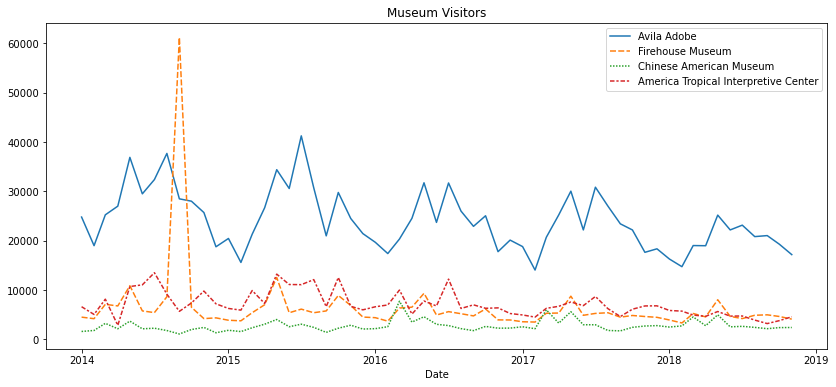

In [6]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")
sns.lineplot(data=df)

In [7]:
df = df.reset_index()

In [8]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name().str[:3]

In [9]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year,Month
0,2014-01-01,24778,4486,1581,6602,2014,Jan
1,2014-02-01,18976,4172,1785,5029,2014,Feb
2,2014-03-01,25231,7082,3229,8129,2014,Mar
3,2014-04-01,26989,6756,2129,2824,2014,Apr
4,2014-05-01,36883,10858,3676,10694,2014,May


In [10]:
df = df.set_index('Month')

<AxesSubplot:title={'center':'All Museum Visitors'}, xlabel='Month', ylabel='Visitors'>

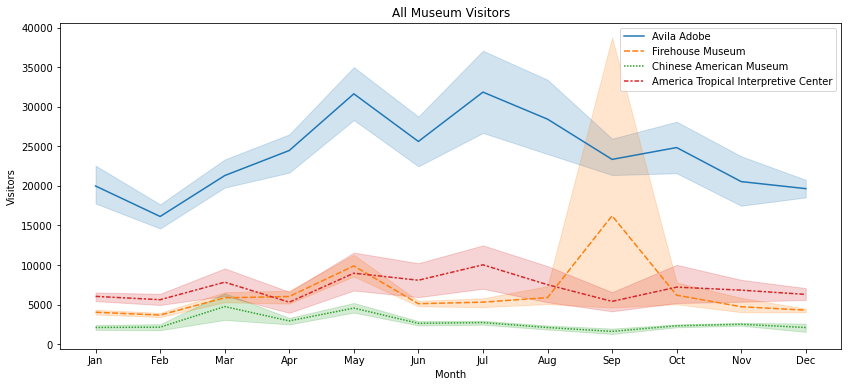

In [11]:
plt.figure(figsize=(14,6))
plt.title("All Museum Visitors")
plt.ylabel("Visitors")
sns.lineplot(data=df.iloc[:,:-1])

#### Only visitors to the Firehouse Museum surged as compared to visitors to the other 3 museums. Check for events held on September 2014 for the Firehouse Museum or cross reference with daily data on Firehouse Museum visitors for discrepancies for the month of September 2014.

In [12]:
df = df.reset_index()

In [13]:
df[df['Month'] == 'Sep'] #note visitors for Firehouse Musem for 2014-09-01

,Month,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
8,Sep,2014-09-01,28473,61192,1073,5661,2014
20,Sep,2015-09-01,20967,5746,1398,6608,2015
32,Sep,2016-09-01,22897,4736,1754,6977,2016
44,Sep,2017-09-01,23403,4484,1704,4607,2017
56,Sep,2018-09-01,21020,4956,2146,3180,2018


#### Assuming the visitor count for the Fire Museum in September 2014 is incorrectly recorded and not the result of any event, we will look to impute September 2014's visitor count for the Firehouse Museum.

In [14]:
df = df.set_index('Date')

#### Assess seasonality peaks/troughs of Firehouse Museum visitors for patterns

<AxesSubplot:title={'center':'Firehouse Museum Visitors'}, xlabel='Date', ylabel='Firehouse Museum'>

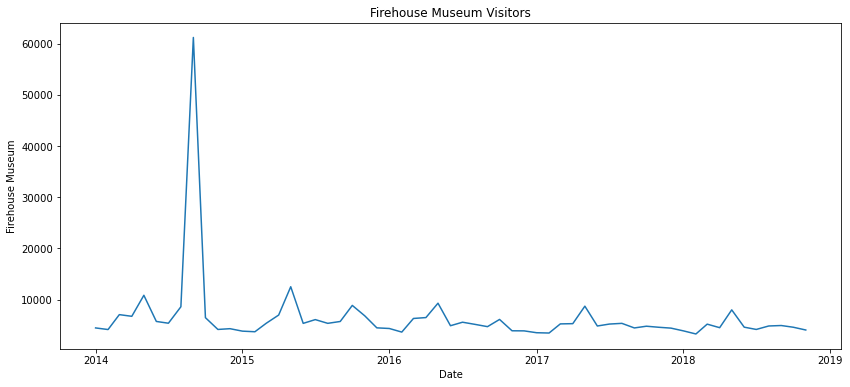

In [15]:
plt.figure(figsize=(14,6))
plt.title("Firehouse Museum Visitors")
sns.lineplot(data=df['Firehouse Museum'])

hard to see due to visitor scale

In [16]:
y2014 = df.iloc[:12, 2]
y2015 = df.iloc[12:24, 2]
y2016 = df.iloc[24:36, 2]
y2017 = df.iloc[36:48, 2]
y2018 = df.iloc[48:, 2]

<AxesSubplot:title={'center':'2018'}, xlabel='Date', ylabel='Visitors'>

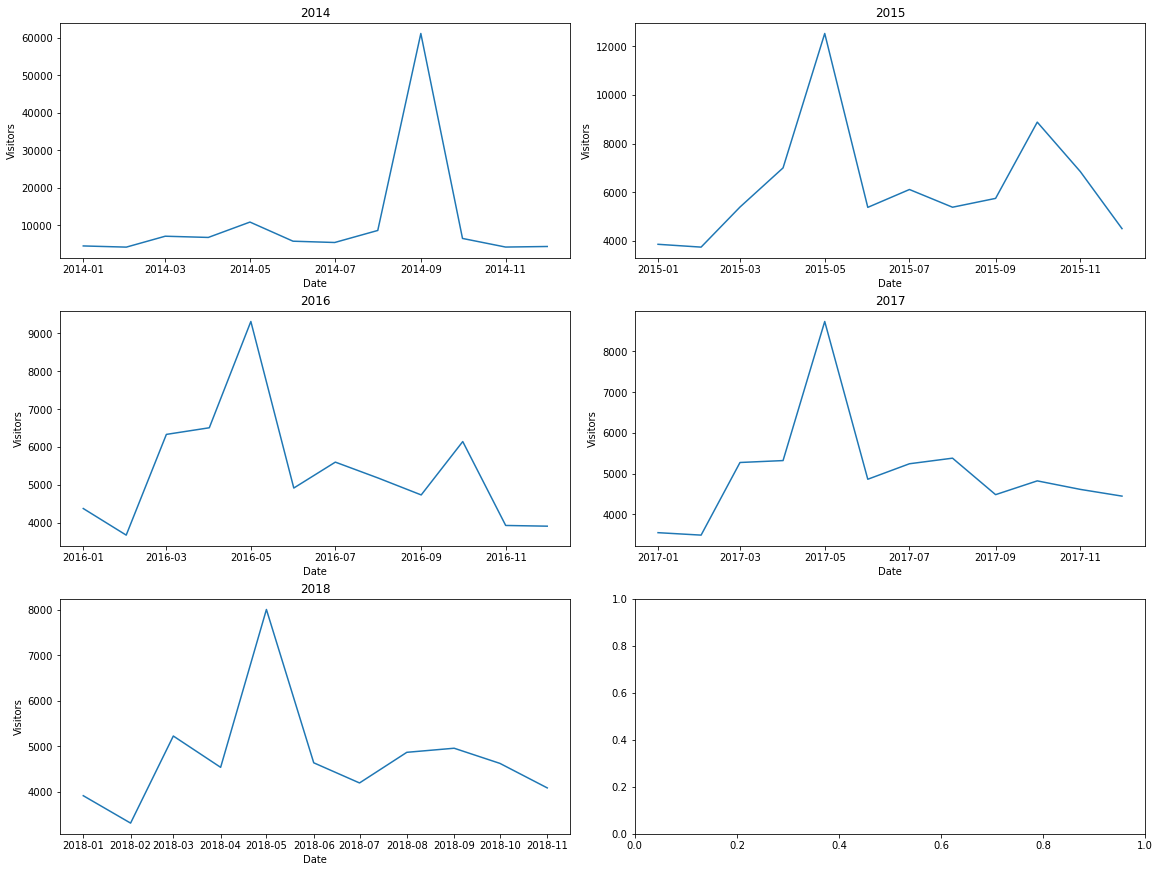

In [17]:
fig, ax = plt.subplots(3,2,figsize=(16,12),constrained_layout=True)
ax[0,0].set_title("2014")
ax[0,1].set_title("2015")
ax[1,0].set_title("2016")
ax[1,1].set_title("2017")
ax[2,0].set_title("2018")
ax[0,0].set_ylabel('Visitors')
ax[0,1].set_ylabel('Visitors')
ax[1,0].set_ylabel('Visitors')
ax[1,1].set_ylabel('Visitors')
ax[2,0].set_ylabel('Visitors')

sns.lineplot(data=y2014, ax=ax[0,0])
sns.lineplot(data=y2015, ax=ax[0,1])
sns.lineplot(data=y2016, ax=ax[1,0])
sns.lineplot(data=y2017, ax=ax[1,1])
sns.lineplot(data=y2018, ax=ax[2,0])

No consistent pattern for visitors in September each year.  
However, looking at the average of June to August for each year could be a decent approximation of September's visitor numbers. Years 2016 and 2017 have September's visitor count at the end of a downtrend whereas for 2015 and 2018, the visitor count ticks upwards. With heavier emphasis on 2015 for being closer to 2014 than the rest of the years, we will simply use the mean visitors of June to August.

In [18]:
df[df['Month'] == 'Sep'] #note visitors for Firehouse Musem for 2014-09-01

,Month,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
Date,,,,,,
2014-09-01,Sep,28473,61192,1073,5661,2014
2015-09-01,Sep,20967,5746,1398,6608,2015
2016-09-01,Sep,22897,4736,1754,6977,2016
2017-09-01,Sep,23403,4484,1704,4607,2017
2018-09-01,Sep,21020,4956,2146,3180,2018


In [19]:
fhm2014 = df['Firehouse Museum'][df['Year'] == 2014] #2014's visitors accross all months
fhm2014

Date
2014-01-01     4486
2014-02-01     4172
2014-03-01     7082
2014-04-01     6756
2014-05-01    10858
2014-06-01     5751
2014-07-01     5406
2014-08-01     8619
2014-09-01    61192
2014-10-01     6488
2014-11-01     4189
2014-12-01     4339
Name: Firehouse Museum, dtype: int64

In [20]:
june_to_august_mean = int(fhm2014[5:8].mean())

In [21]:
fhm2014[8] = june_to_august_mean

In [22]:
fhm2014

Date
2014-01-01     4486
2014-02-01     4172
2014-03-01     7082
2014-04-01     6756
2014-05-01    10858
2014-06-01     5751
2014-07-01     5406
2014-08-01     8619
2014-09-01     6592
2014-10-01     6488
2014-11-01     4189
2014-12-01     4339
Name: Firehouse Museum, dtype: int64

In [23]:
df['Firehouse Museum'][df['Year'] == 2014] = fhm2014

C:\Users\dnkr9\AppData\Local\Temp/ipykernel_13388/3762610956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Firehouse Museum'][df['Year'] == 2014] = fhm2014


In [24]:
df = df.reset_index()

In [25]:
df['Firehouse Museum'][df['Date'] == '2014-09-01'] #immuted

8    6592
Name: Firehouse Museum, dtype: int64

In [26]:
df = df.set_index('Date')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Date'>

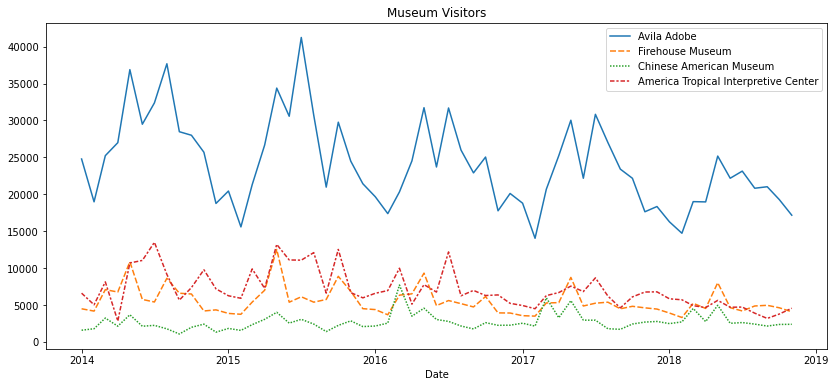

In [27]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")
sns.lineplot(data=df.loc[:, ['Avila Adobe', 'Firehouse Museum', 'Chinese American Museum', 'America Tropical Interpretive Center']])

In [28]:
df = df.reset_index()
df = df.set_index('Month')

#### Monthly average visitors by museum with Confidence Interval areas

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

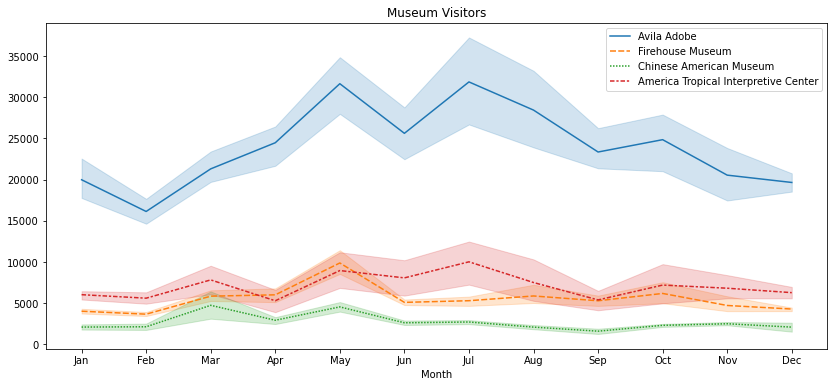

In [30]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")
sns.lineplot(data=df.iloc[:,:-1])

#### Looks better now. Now lets analyze the visitor count for the 4 individual museums

In [31]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
Month,,,,,,
Jan,2014-01-01,24778,4486,1581,6602,2014
Feb,2014-02-01,18976,4172,1785,5029,2014
Mar,2014-03-01,25231,7082,3229,8129,2014
Apr,2014-04-01,26989,6756,2129,2824,2014
May,2014-05-01,36883,10858,3676,10694,2014


<AxesSubplot:xlabel='America Tropical Interpretive Center', ylabel='Visitors'>

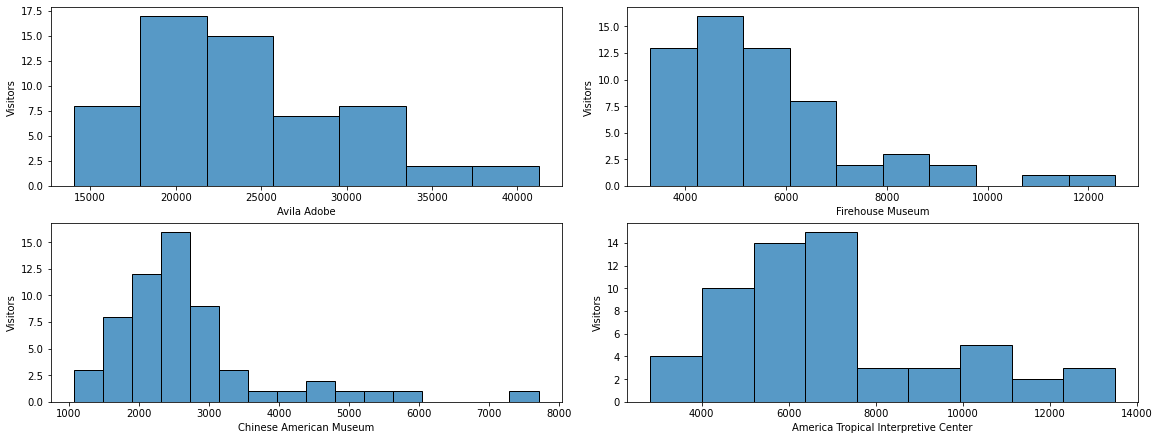

In [32]:
fig, ax = plt.subplots(2,2,figsize=(16,6),constrained_layout=True)
ax[0,0].set_ylabel('Visitors')
ax[0,1].set_ylabel('Visitors')
ax[1,0].set_ylabel('Visitors')
ax[1,1].set_ylabel('Visitors')

sns.histplot(data=df.iloc[:,1], ax=ax[0,0])
sns.histplot(data=df.iloc[:,2], ax=ax[0,1])
sns.histplot(data=df.iloc[:,3], ax=ax[1,0])
sns.histplot(data=df.iloc[:,4], ax=ax[1,1])

<AxesSubplot:title={'center':'America Tropical Interpretive Center'}, xlabel='Month', ylabel='Visitors'>

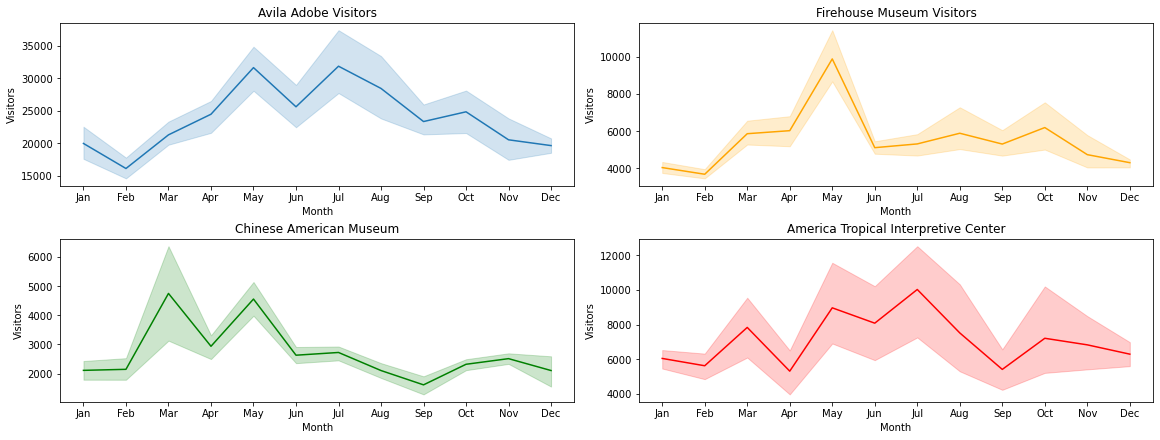

In [33]:
fig, ax = plt.subplots(2,2,figsize=(16,6),constrained_layout=True)
ax[0,0].set_title("Avila Adobe Visitors")
ax[0,1].set_title("Firehouse Museum Visitors")
ax[1,0].set_title("Chinese American Museum")
ax[1,1].set_title("America Tropical Interpretive Center")
ax[0,0].set_ylabel('Visitors')
ax[0,1].set_ylabel('Visitors')
ax[1,0].set_ylabel('Visitors')
ax[1,1].set_ylabel('Visitors')

sns.lineplot(data=df.iloc[:,1], ax=ax[0,0])
sns.lineplot(data=df['Firehouse Museum'],ax=ax[0,1], color='orange')
sns.lineplot(data=df['Chinese American Museum'],ax=ax[1,0], color='green')
sns.lineplot(data=df['America Tropical Interpretive Center'],ax=ax[1,1], color='red')

### The line on each plot is the average visitors by each museum across 2014-2018. The colored area above and below the mean line is the 95% confidence interval where the visitor count will potentially stretch to on either ends

Avila Adobe visitors are on the low side in February and peak in May and July.  
Firehouse Musem visitors are low at the start and ends of the year (Jan-Feb, Nov-Dec), and is highest in May.  
Chinese American Musem visitors are lowest In September and highest in March and May.  
America Tropical Inerpretive Center visitors are low in April & September, and high in May and July.

In [34]:
from scipy import stats

<AxesSubplot:title={'center':'Normalized Avila Adobe Visitors'}, xlabel='Month', ylabel='Avila Adobe'>

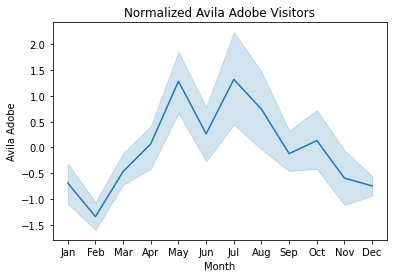

In [35]:
plt.title("Normalized Avila Adobe Visitors")
sns.lineplot(data=stats.zscore(df['Avila Adobe']))

In [36]:
df = df.reset_index()

In [37]:
df_norm = df.copy()
df_norm2 = df_norm.copy()

In [38]:
df_norm['Avila Adobe'] = stats.zscore(df['Avila Adobe'])

In [39]:
stats.zscore(df['Avila Adobe']).head()

0    0.121447
1   -0.862215
2    0.198248
3    0.496297
4    2.173710
Name: Avila Adobe, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
df_norm = df.copy()
cols = df.columns[2:-1]

#### Z-score Standardization

In [42]:
scaler = StandardScaler()
X = df_norm.iloc[:,2:-1].values
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=cols)
df_norm = df_norm.join(df_scaled, how='outer', rsuffix='_scaled').set_index('Month')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

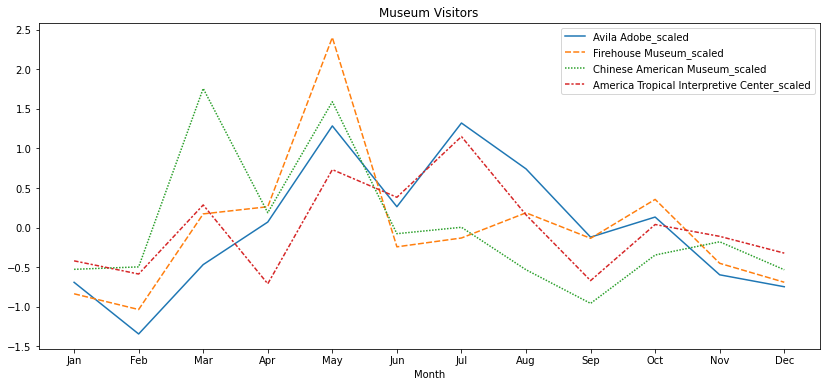

In [43]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")

sns.lineplot(data=df_norm.iloc[:,6:], ci=None)

#### Min-Max Scaler

In [44]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)
df_scaled2 = pd.DataFrame(X_scaled2, columns=cols)
df_norm3 = df_norm2.join(df_scaled2, how='outer', rsuffix='_scaled').set_index('Month')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

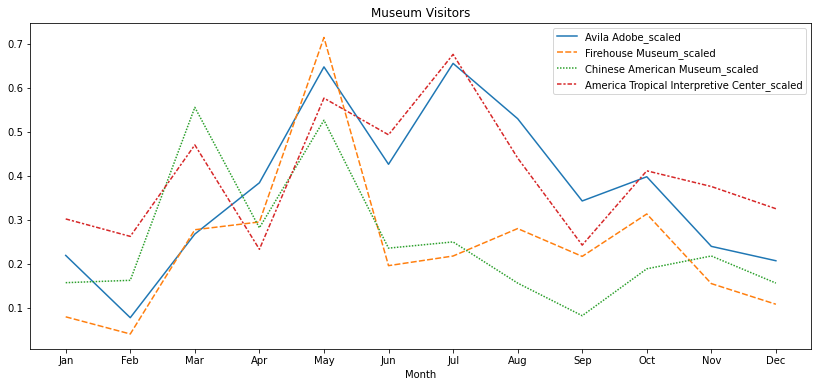

In [45]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")

sns.lineplot(data=df_norm3.iloc[:,6:], ci=None)

<AxesSubplot:title={'center':'min-max'}, xlabel='Month', ylabel='Visitors'>

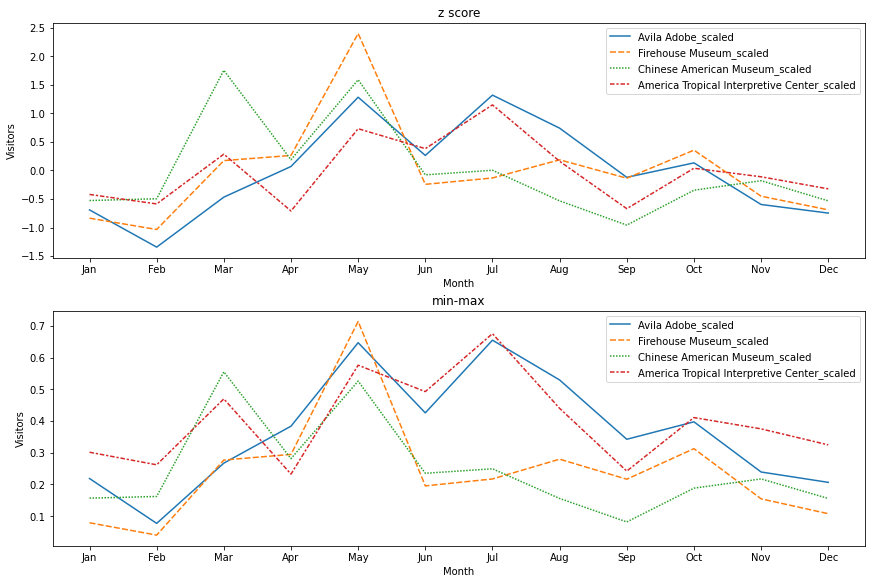

In [46]:
fig, ax = plt.subplots(2,1,figsize=(12,8),constrained_layout=True)
ax[0].set_title("z score")
ax[1].set_title("min-max")
#ax[1,0].set_title("Chinese American Museum")
#ax[1,1].set_title("America Tropical Interpretive Center")
ax[0].set_ylabel('Visitors')
ax[1].set_ylabel('Visitors')
#ax[1,0].set_ylabel('Visitors')
#ax[1,1].set_ylabel('Visitors')

sns.lineplot(data=df_norm.iloc[:,6:], ci=None, ax=ax[0])
sns.lineplot(data=df_norm3.iloc[:,6:], ci=None, ax=ax[1])
#sns.lineplot(data=df.iloc[:,1], ax=ax[0,0])
#sns.lineplot(data=df['Firehouse Museum'],ax=ax[0,1], color='red')
#sns.lineplot(data=df['Chinese American Museum'],ax=ax[1,0], color='green')
#sns.lineplot(data=df['America Tropical Interpretive Center'],ax=ax[1,1], color='orange')

### Incongruency in seasonality across museums:
- If given the necessary data, we should drill down on why visitor numbers differs across museums so we can narrow down on whether it be because of seasonality or other reasons, and from there further target seasonal events to promote the museum, or if for other reasons, explore the potential available.

### Some seasonal incongruities:
- Visitor numbers dip across all museums except the <b>Chinese American Musem</b> in the month of <b>February</b>.  

- Visitor numbers dip from <b>March to April</b> for the <b>Chinese American Museum and America Tropical Interpretive Center</b>.  

- Visitor numbers spike harder from <b>June to July</b> for the <b>Avila Adobe Museum and America Tropical Interpretive Center</b>.  

- Visitor numbers increase from <b>July to August</b> for the <b>Firehouse Museum</b> but decrease for the other museums.  

- Visitor numbers increase from <b>October to November</b> for the <b>Chinese American Museum</b> but decrease for the other 3 museums  

### Strategies from a business perspective:
Apart from supplementing/reducing staffing according to the museum's seasonality, we can also take a step further by potentially looking at intra-day data to implement the following:

* Staffing can be adjusted to save manpower cost and potentially utility expenses depending on the time range of visits. (e.g. if less visitors after 4pm on tuesdays, museum can have less shift workers on tuesdays working up till 4pm)  

* Staffing can also be supplemented during peak visitor periods to better engage them for a better visitor experience / facilitate faster moving traffic so that the museum will be less congested at each exhibit.  

* Tour programmes can be arranged during low visitors periods at discounted pricing to boost visitor numbers and charged a peak fee during peak periods to maximize revenues.  

### Improvements to data collection that can potentially help with future data-driven decisions:

Lower level aggregation of data to view number of visits on a daily basis with more details.

i.e. Customer segmentation through categorical grouping of visitor types, i.e. tour groups, school excursions, tourists, individuals, etc.  

Event-driven visits, i.e cultural holidays, tours, limited time exhibitions, art displays, workshops, talks, etc.

Visitor count inside the museum per hour of the day